# Monte Carlo Simulation - Roulette

### Jim Finnegan

_______________________________________

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Spin:
    
    NUMBERS = ['0', '00', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 
               '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', 
               '33', '34', '35', '36']
    COLORS ={'1': 'red', 
             '2': 'black', 
             '3': 'red', 
             '4': 'black', 
             '5': 'red', 
             '6': 'black', 
             '7': 'red', 
             '8': 'black', 
             '9': 'red', 
             '10': 'black', 
             '11': 'black', 
             '12': 'red', 
             '13': 'black', 
             '14': 'red', 
             '15': 'black',
             '16': 'red', 
             '17': 'black', 
             '18': 'red', 
             '19': 'red', 
             '20': 'black', 
             '21': 'red', 
             '22': 'black', 
             '23': 'red', 
             '24': 'black',
             '25': 'red',
             '26': 'black', 
             '27': 'red',
             '28': 'black',
             '29': 'black',
             '30': 'red',
             '31': 'black',
             '32': 'red',
             '33': 'black',
             '34': 'red',
             '35': 'black',
             '36': 'red',
             '0': 'green',
             '00': 'green'}
    
    def __init__(self):
        self.color = ''
        self.number = ''
        self.spin()
    
    def __repr__(self):
        return self.number + ' ' + self.color
    
    def __str__(self):
        return self.number + ' ' + self.color
    
    
    def spin(self):
        i = np.random.choice(Spin.NUMBERS)
        self.number = i
        self.color = Spin.COLORS[i]

In [35]:
def color_bet(color, qty):
    s = Spin()
    spin_color = s.color
    result = (s.color == color)

    if result == True:
        return qty, spin_color
    else:
        return -qty, spin_color

In [55]:
def number_bet(number, qty):
    s = Spin()
    spin_number = s.number
    
    result = (spin_number == number)
    
    if result == True:
        return 36*qty
    else:
        return -qty

___________

## Simulation: betting on one color

### 100,000 trials: each with 100 bets of the same amount on the same color

In [36]:
single_black_results = []
t = 0

# 100,000 trials
while t < 100000:
    
    # reset for each trial
    stack, k = 0, 0
    
    # 100 bets in each trial, simulate and increment
    while k < 100:
        result, color = color_bet('black', 1)
        stack += result
        k += 1
    # append result to list and increment
    single_black_results.append(stack)
    t += 1

In [37]:
results_df = pd.DataFrame(single_black_results, columns = ['Single_Black'])

(array([5.0000e+00, 2.0000e+01, 1.0000e+02, 3.2400e+02, 1.9220e+03,
        3.4510e+03, 6.2900e+03, 9.9170e+03, 2.1098e+04, 1.6056e+04,
        1.4257e+04, 1.1243e+04, 1.0134e+04, 3.0330e+03, 1.3780e+03,
        5.4600e+02, 1.9500e+02, 2.2000e+01, 6.0000e+00, 3.0000e+00]),
 array([-48. , -43.5, -39. , -34.5, -30. , -25.5, -21. , -16.5, -12. ,
         -7.5,  -3. ,   1.5,   6. ,  10.5,  15. ,  19.5,  24. ,  28.5,
         33. ,  37.5,  42. ]),
 <a list of 20 Patch objects>)

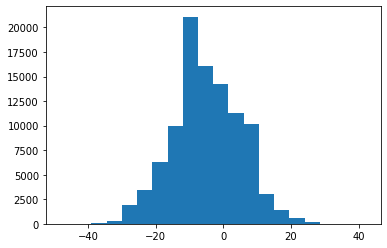

In [38]:
plt.hist(results_df['Single_Black'], bins = 20)

In [39]:
# ECDF function
def ecdf(data):  
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    
    return x, y

<function matplotlib.pyplot.show(*args, **kw)>

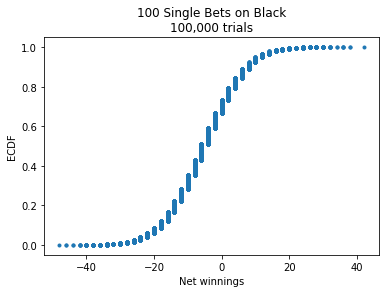

In [52]:
x_black_single, y_black_single = ecdf(results_df['Single_Black'])
plt.plot(x_black_single, y_black_single, marker='.', linestyle='none')
plt.xlabel('Net winnings')
plt.ylabel('ECDF')
plt.title('100 Single Bets on Black\n100,000 trials')

In [47]:
# summary statistics
results_df.describe()

,Single_Black,Gamblers_Fallacy_Black
count,100000.000000,100000.000000
mean,-5.275100,-5.952510
std,10.008486,11.966168
min,-48.000000,-80.000000
25%,-12.000000,-13.000000
50%,-6.000000,-5.000000
75%,2.000000,2.000000
max,42.000000,38.000000


### Test of Gambler's Fallacy

#### if red shows for at least 7 out of 10 spins, double bet on black

In [45]:
gamblers_fallacy_results = []
t = 0

#100,000 trials
while t < 100000:
    
    # reset for each trial
    colors, stack, k = [], 0, 0
    
    # 100 bets for each trial, simulate and increment
    while k < 100:
                    
        # check for 7 out of 10 reds, double bet if more than 7 of the previous spins have been red
        if k >= 10:
            if sum(colors[k-10:k]) >= 7:
                result, color = color_bet('black', 2)
            else:
                result, color = color_bet('black', 1)
        
        # bet 1 unit for the first 10 spins
        else:
            result, color = color_bet('black', 1)
        
        
        # check for red spin and track
        if color == 'red':
            colors.append(1)
        else:
            colors.append(0)

        stack += result
        k += 1
    
    # append result to list and increment
    gamblers_fallacy_results.append(stack)
    t += 1    

In [46]:
results_df['Gamblers_Fallacy_Black'] = pd.DataFrame(gamblers_fallacy_results)

(array([1.0000e+00, 4.0000e+00, 8.0000e+00, 2.0000e+01, 7.1000e+01,
        2.1900e+02, 5.6100e+02, 1.3580e+03, 3.0240e+03, 4.9360e+03,
        9.8490e+03, 1.5596e+04, 2.0022e+04, 1.9963e+04, 1.4336e+04,
        7.0140e+03, 2.4000e+03, 5.3800e+02, 7.5000e+01, 5.0000e+00]),
 array([-80. , -74.1, -68.2, -62.3, -56.4, -50.5, -44.6, -38.7, -32.8,
        -26.9, -21. , -15.1,  -9.2,  -3.3,   2.6,   8.5,  14.4,  20.3,
         26.2,  32.1,  38. ]),
 <a list of 20 Patch objects>)

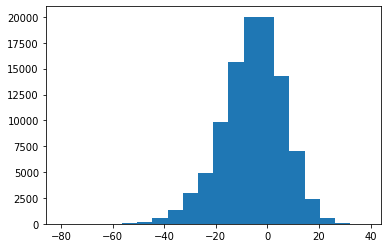

In [49]:
plt.hist(results_df['Gamblers_Fallacy_Black'], bins = 20)

<function matplotlib.pyplot.show(*args, **kw)>

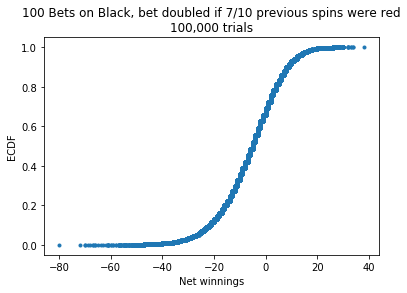

In [51]:
x_black_gf, y_black_gf = ecdf(results_df['Gamblers_Fallacy_Black'])
plt.plot(x_black_gf, y_black_gf, marker='.', linestyle='none')
plt.title('100 Bets on Black, bet doubled if 7/10 previous spins were red\n100,000 trials')

Text(0.5, 1.0, 'Comparison')

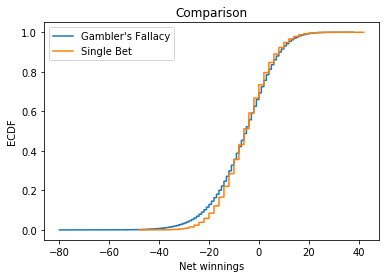

In [54]:
# comparison
plt.plot(x_black_gf, y_black_gf, x_black_single, y_black_single)
plt.xlabel('Net winnings')
plt.ylabel('ECDF')
plt.legend(["Gambler's Fallacy", "Single Bet"])
plt.title('Comparison')

_______________

## Betting on a Number
#### 100,000 trials, each with 100 bets on the same number

In [57]:
single_00_results = []
t = 0

# 100,000 trials
while t < 100000:
    
    # reset for each trial
    stack, k = 0, 0
    
    # 100 bets in each trial, simulate and increment
    while k < 100:
        result = number_bet('00', 1)
        stack += result
        k += 1
    # append result to list and increment
    single_00_results.append(stack)
    t += 1

In [59]:
results_df['Single_00'] = pd.DataFrame(single_00_results)

### Test Gambler's Fallacy
#### if 00 does not show in 50 spins, double bet on 00

In [58]:
gamblers_fallacy_results_00 = []
t = 0

#100,000 trials
while t < 100000:
    
    # reset for each trial
    nums, stack, k = [], 0, 0
    
    # 100 bets for each trial, simulate and increment
    while k < 100:
                    
        # check for 00 in previous 50 spins, if not shown up, double bet
        if k >= 50:
            if sum(nums[k-50:k]) < 1:
                result = number_bet('00', 2)
            else:
                result = number_bet('00', 1)
        
        # bet 1 unit for the first 50 spins
        else:
            result = number_bet('00', 1)
        
        
        # check for red spin and track
        if result > 0:
            nums.append(1)
        else:
            nums.append(0)

        stack += result
        k += 1
    
    # append result to list and increment
    gamblers_fallacy_results_00.append(stack)
    t += 1  

In [60]:
results_df['00_gf'] = pd.DataFrame(gamblers_fallacy_results_00)

In [61]:
results_df.describe()

,Single_Black,Gamblers_Fallacy_Black,Single_00,00_gf
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,-5.275100,-5.952510,-2.963800,-3.057090
std,10.008486,11.966168,59.268121,70.224244
min,-48.000000,-80.000000,-100.000000,-150.000000
25%,-12.000000,-13.000000,-63.000000,-44.000000
50%,-6.000000,-5.000000,-26.000000,5.000000
75%,2.000000,2.000000,48.000000,48.000000
max,42.000000,38.000000,344.000000,344.000000


In [62]:
x_00, y_00 = ecdf(results_df['Single_00'])
x_00_gf, y_00_gf = ecdf(results_df['00_gf'])

(array([2.5940e+04, 2.5323e+04, 2.1826e+04, 1.4573e+04, 7.4150e+03,
        4.4290e+03, 3.6500e+02, 8.9000e+01, 3.0000e+01, 1.0000e+01]),
 array([-100. ,  -55.6,  -11.2,   33.2,   77.6,  122. ,  166.4,  210.8,
         255.2,  299.6,  344. ]),
 <a list of 10 Patch objects>)

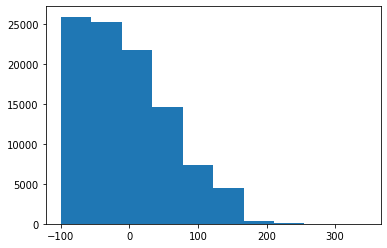

In [63]:
plt.hist(results_df['Single_00'])

(array([9.1420e+03, 1.3361e+04, 2.4050e+04, 2.7345e+04, 2.0266e+04,
        3.9140e+03, 1.4280e+03, 4.6800e+02, 2.2000e+01, 4.0000e+00]),
 array([-150. , -100.6,  -51.2,   -1.8,   47.6,   97. ,  146.4,  195.8,
         245.2,  294.6,  344. ]),
 <a list of 10 Patch objects>)

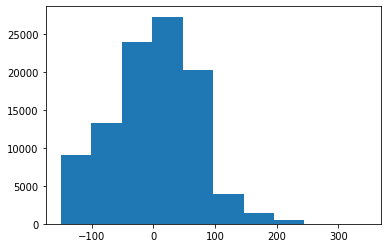

In [64]:
plt.hist(results_df['00_gf'])

Text(0.5, 1.0, '100 unit bets on 00\n100,000 trials')

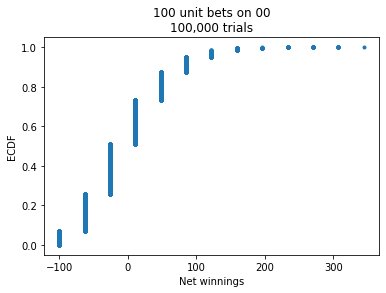

In [66]:
plt.plot(x_00, y_00, marker='.', linestyle='none')
plt.xlabel('Net winnings')
plt.ylabel('ECDF')
plt.title('100 unit bets on 00\n100,000 trials')

Text(0.5, 1.0, '100 bets on 00, bet doubled if 0/50 previous spins were 00\n100,000 trials')

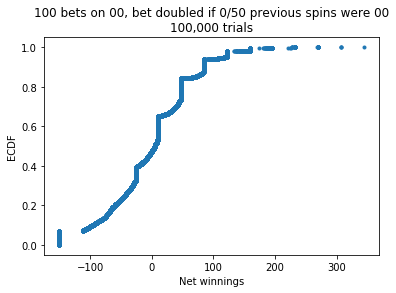

In [67]:
plt.plot(x_00_gf, y_00_gf, marker='.', linestyle='none')
plt.xlabel('Net winnings')
plt.ylabel('ECDF')
plt.title('100 bets on 00, bet doubled if 0/50 previous spins were 00\n100,000 trials')

Text(0.5, 1.0, 'Comparison - Number Betting')

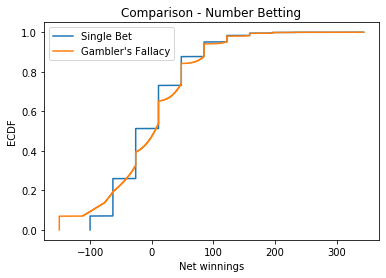

In [68]:
# comparison
plt.plot(x_00, y_00, x_00_gf, y_00_gf)
plt.xlabel('Net winnings')
plt.ylabel('ECDF')
plt.legend(["Single Bet", "Gambler's Fallacy"])
plt.title('Comparison - Number Betting')